In [6]:
! pip install openpyxl

  Using cached openpyxl-3.0.7-py2.py3-none-any.whl (243 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR

In [2]:
data = pd.read_excel("data.xlsx",skiprows=list(range(0,10)), index_col=0, parse_dates=True)
data

,GOLDAMGBD228NLBM,Unnamed: 2,Unnamed: 3,Unnamed: 4
observation_date,,,,
1968-04-01,38.00,NaN,NaN,NaN
1968-04-02,37.60,NaN,NaN,NaN
1968-04-03,37.70,NaN,NaN,NaN
1968-04-04,36.70,NaN,NaN,NaN
1968-04-05,37.20,NaN,NaN,NaN
...,...,...,...,...
2021-07-15,1832.00,NaN,NaN,NaN
2021-07-16,1822.00,NaN,NaN,NaN
2021-07-19,1803.25,NaN,NaN,NaN


In [3]:
start_date = data.index[0]
end_date = data.index[-1]
dates = pd.date_range(start_date, end_date)
missing = []
nan_data = []

for date in dates:
    if date not in data.index:
        missing.append(date)
        nan_data.append(np.nan)
        
df = pd.DataFrame({"GOLDAMGBD228NLBM": nan_data}, index= missing)

df

,GOLDAMGBD228NLBM
1968-04-06,NaN
1968-04-07,NaN
1968-04-13,NaN
1968-04-14,NaN
1968-04-20,NaN
...,...
2021-07-04,NaN
2021-07-10,NaN
2021-07-11,NaN
2021-07-17,NaN


In [4]:
total_df = pd.concat([data, df])
total_df.sort_index(inplace= True)
total_df

,GOLDAMGBD228NLBM,Unnamed: 2,Unnamed: 3,Unnamed: 4
1968-04-01,38.00,NaN,NaN,NaN
1968-04-02,37.60,NaN,NaN,NaN
1968-04-03,37.70,NaN,NaN,NaN
1968-04-04,36.70,NaN,NaN,NaN
1968-04-05,37.20,NaN,NaN,NaN
...,...,...,...,...
2021-07-17,NaN,NaN,NaN,NaN
2021-07-18,NaN,NaN,NaN,NaN
2021-07-19,1803.25,NaN,NaN,NaN
2021-07-20,1815.30,NaN,NaN,NaN


In [5]:
df = total_df.interpolate(method ='linear', limit_direction ='forward', limit = 100)
df.isnull().sum()

GOLDAMGBD228NLBM        0
Unnamed: 2          19470
Unnamed: 3          19470
Unnamed: 4          19470
dtype: int64

In [6]:
d = { 'GLD':df["GOLDAMGBD228NLBM"]}
df = pd.DataFrame(data=d)
df

,GLD
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-17,1815.75
2021-07-18,1809.50
2021-07-19,1803.25
2021-07-20,1815.30


Mean= 573.2989746019517
Standard Deviation= 485.2790992238249
Kurtosis= 0.09644041582980822


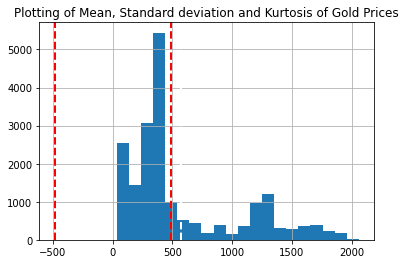

In [7]:
# computing mean,standard deviation and kurtosis of Gold ETF daily return

mean=df['GLD'].mean()
# computing standard deviation of Gold stock
std=df['GLD'].std()
kurt=df['GLD'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df['GLD'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

## Technical Indicators

1. MACD : The moving average convergence-divergence (MACD) is one of the most powerful and well-known indicators in technical analysis. The indicator is comprised of two exponential moving averages that help measure momentum in a security. The MACD is simply the difference between these two moving averages plotted against a centerline, where the centerline is the point at which the two moving averages are equal.

2. RSI : The relative strength index (RSI) is another well known momentum indicators that’s widely used in technical analysis. The indicator is commonly used to identify overbought and oversold conditions in a security with a range between 0 (oversold) and 100 (overbought).

3. Simple Moving Average (SMA) : simply takes the sum of all of the past closing prices over a time period and divides the result by the total number of prices used in the calculation. For example, a 10-day simple moving average takes the last ten closing prices and divides them by ten.

4. Upper Band

5. Lower Band

6. DIFF

In [8]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

## Plotting Technical Indicators

C:\Users\abdhi\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\abdhi\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\abdhi\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\abdhi\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:

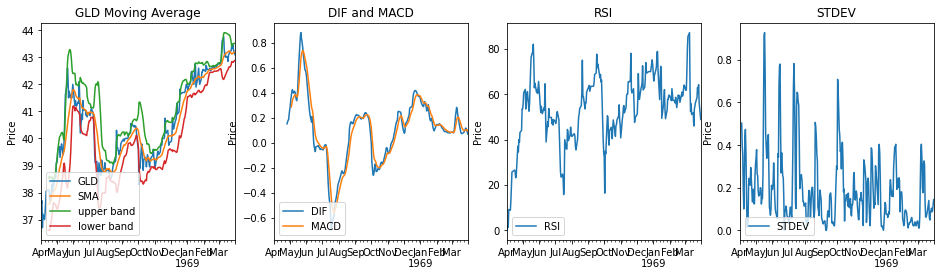

In [9]:
GLD_adj_close = df['GLD']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])


axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

In [10]:
test = df
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target_adj_close = pd.DataFrame(test['GLD'])


In [11]:
test.head(10)

,GLD,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
1968-05-04,39.633333,38.645556,39.762344,37.528767,0.380377,0.287309,61.177366,0.263101
1968-05-05,39.666667,38.765556,39.910140,37.620971,0.406770,0.314075,61.639328,0.257660
1968-05-06,39.700000,38.873333,40.046702,37.699965,0.425239,0.338397,62.122241,0.182726
1968-05-07,39.300000,38.940000,40.087101,37.792899,0.404583,0.352611,53.468131,0.160900
1968-05-08,39.500000,39.036667,40.103943,37.969390,0.398938,0.362415,56.699603,0.163978
1968-05-09,39.700000,39.126667,40.173264,38.080070,0.405162,0.371358,59.698326,0.173845
1968-05-10,39.800000,39.230000,40.209569,38.250431,0.413023,0.379995,61.140042,0.200000
1968-05-11,39.666667,39.307778,40.222027,38.393528,0.404219,0.384980,58.167427,0.196356
1968-05-12,39.533333,39.375556,40.182949,38.568162,0.382443,0.384461,55.287364,0.123378
1968-05-13,39.400000,39.433333,40.092939,38.773728,0.350734,0.377592,52.502127,0.155635


In [12]:
test.shape

(19437, 8)

In [13]:
test =  test.drop('GLD',axis=1)

In [14]:
test

,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
1968-05-04,38.645556,39.762344,37.528767,0.380377,0.287309,61.177366,0.263101
1968-05-05,38.765556,39.910140,37.620971,0.406770,0.314075,61.639328,0.257660
1968-05-06,38.873333,40.046702,37.699965,0.425239,0.338397,62.122241,0.182726
1968-05-07,38.940000,40.087101,37.792899,0.404583,0.352611,53.468131,0.160900
1968-05-08,39.036667,40.103943,37.969390,0.398938,0.362415,56.699603,0.163978
...,...,...,...,...,...,...,...
2021-07-17,1806.070000,1830.395772,1781.744228,1.820718,-3.259669,53.539431,9.280396
2021-07-18,1807.637778,1829.300933,1785.974623,1.644563,-2.278823,50.244331,8.842469
2021-07-19,1808.623333,1827.744558,1789.502109,0.989233,-1.625212,47.136111,11.131318
2021-07-20,1810.246667,1826.914663,1793.578671,1.425778,-1.015014,53.126101,7.089376


## Normalizing the data

In [15]:
# selecting Feature Columns
feature_columns = ['SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD','RSI','STDEV']

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
1968-05-04,0.001927,0.002312,0.001663,0.389025,0.398343,0.619818,0.003188
1968-05-05,0.001988,0.002384,0.001712,0.389226,0.398591,0.624794,0.003122
1968-05-06,0.002043,0.002451,0.001754,0.389367,0.398816,0.629996,0.002214
1968-05-07,0.002077,0.002470,0.001803,0.389210,0.398947,0.536773,0.001949
1968-05-08,0.002126,0.002479,0.001897,0.389167,0.399038,0.571583,0.001987


In [17]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-2000:-1]
target_adj_close = target_adj_close[:-2000]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-2000:-1]
feature_minmax_transform = feature_minmax_transform[:-2000]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
1968-05-04,0.001927,0.002312,0.001663,0.389025,0.398343,0.619818,0.003188
1968-05-05,0.001988,0.002384,0.001712,0.389226,0.398591,0.624794,0.003122
1968-05-06,0.002043,0.002451,0.001754,0.389367,0.398816,0.629996,0.002214
1968-05-07,0.002077,0.002470,0.001803,0.389210,0.398947,0.536773,0.001949
1968-05-08,0.002126,0.002479,0.001897,0.389167,0.399038,0.571583,0.001987


Shape of features :  (19437, 7)
Shape of target :  (19437, 1)


,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
2021-07-16,0.901150,0.873398,0.925860,0.396666,0.353795,0.575144,0.140311
2021-07-17,0.902245,0.873493,0.928040,0.400006,0.365541,0.537541,0.112435
2021-07-18,0.903044,0.872960,0.930287,0.398663,0.374612,0.502046,0.107130
2021-07-19,0.903546,0.872203,0.932160,0.393667,0.380656,0.468564,0.134860
2021-07-20,0.904373,0.871799,0.934326,0.396995,0.386299,0.533089,0.085890


,GLD
2021-07-16,1815.75
2021-07-17,1809.50
2021-07-18,1803.25
2021-07-19,1815.30
2021-07-20,1805.90



 -----After process------ 

Shape of features :  (17437, 7)
Shape of target :  (17437, 1)


,GLD
2016-01-25,1114.700000
2016-01-26,1116.500000
2016-01-27,1119.000000
2016-01-28,1112.900000
2016-01-29,1115.933333


In [18]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [19]:
X_train.shape

(15852, 7)

In [20]:
X_test.shape

(1585, 7)

In [21]:
y_train.shape

(15852,)

In [22]:
y_test.shape

(1585,)

In [23]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Model Building

RMSE:  58.03450177411975
R2 score:  0.941491465057251


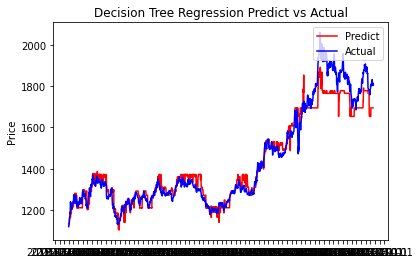

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

## Support Vector Regressor (SVR)

RMSE:  25.560374653937252
R2 score:  0.9886503849077446


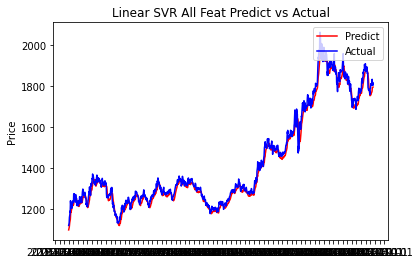

In [25]:
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')

RMSE:  48.63854425273055
R2 score:  0.958903215899197


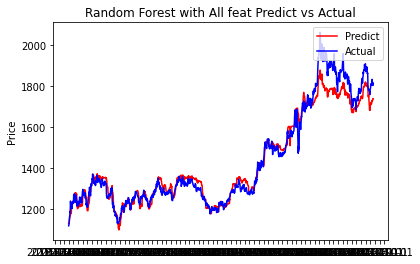

In [26]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

In [27]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

grid_search_RF_feat.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}
RMSE:  48.5078776612629
R2 score:  0.9591237308676144


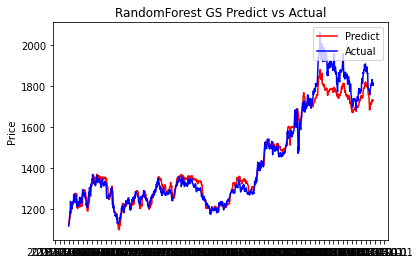

In [28]:
print(grid_search_RF_feat.best_params_)
validate_result(grid_search_RF_feat,'RandomForest GS')

RMSE:  18.323580934523136
R2 score:  0.9941673300185231


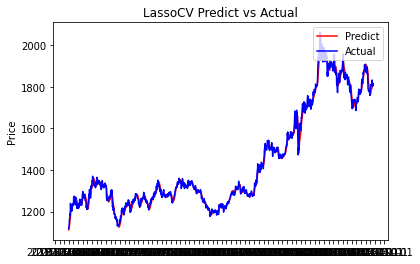

RMSE:  13.679082464005495
R2 score:  0.9967494216526905


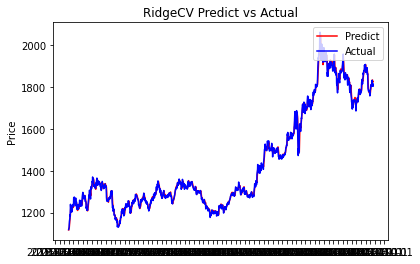

In [29]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

RMSE:  13.661820568042506
R2 score:  0.9967576204103973


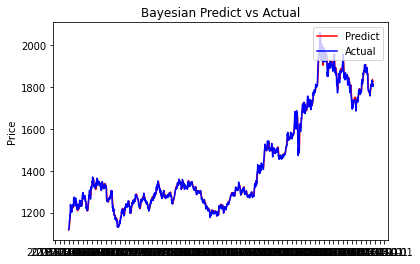

In [30]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

RMSE:  48.43604876111883
R2 score:  0.9592446977602528


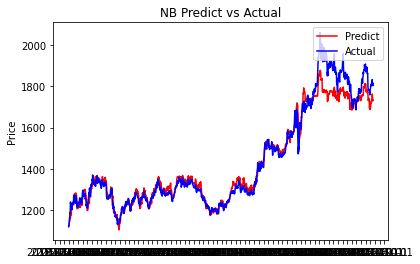

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')
solution_models['GB All Feat'] = GB_feat

RMSE:  20.072166389413677
R2 score:  0.9930010127946113


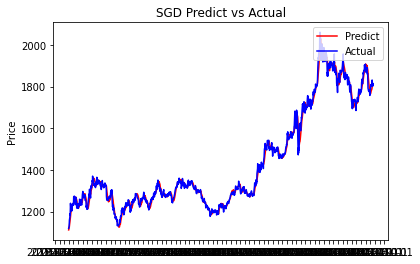

In [32]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

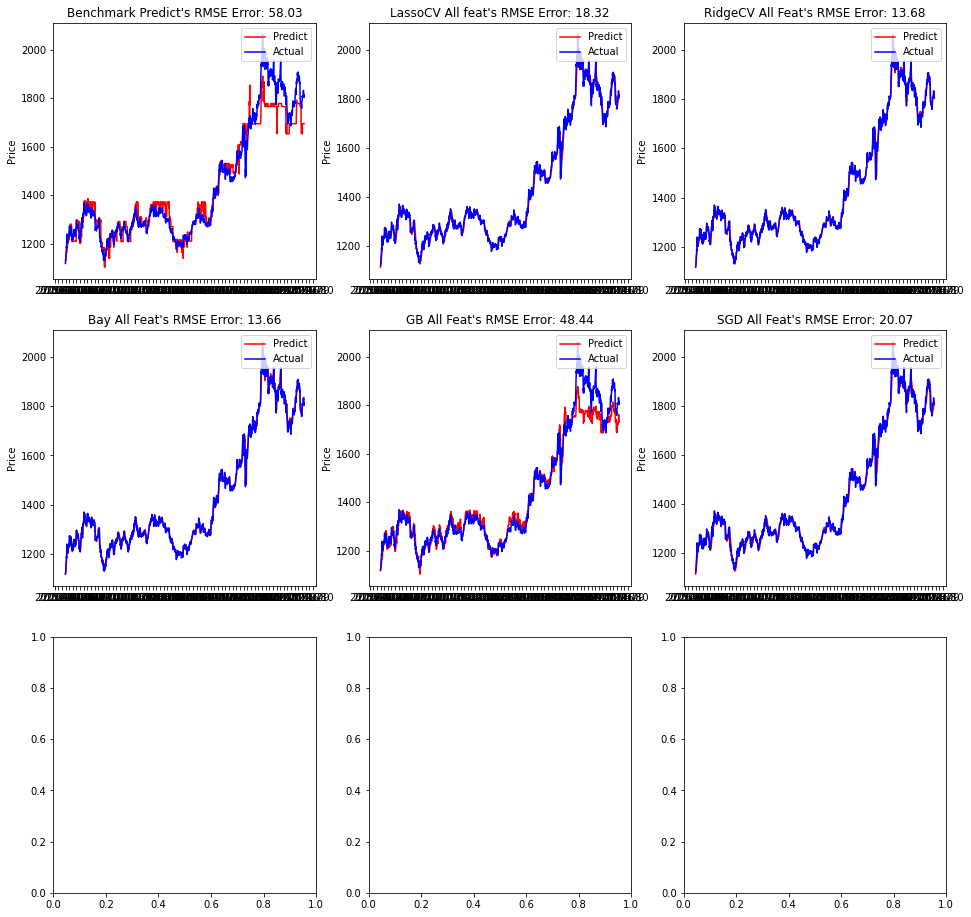

In [33]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

           
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)